## Berlin analysis

### Dataset HK_Cities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object})

df = pd.DataFrame(hk_cities)

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_67199/863109955.py:4: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object})


In [2]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)

merged_df = pd.merge(df, df_plz_city, how='left', on='plz')

berlin_df = merged_df[merged_df['ort'] == 'Berlin']
berlin_df['adat_year'] = berlin_df['adat'].astype(str).str[:4]

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_67199/3259588682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_df['adat_year'] = berlin_df['adat'].astype(str).str[:4]


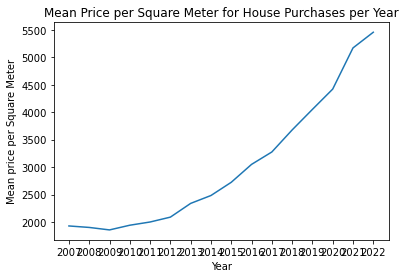

adat_year
2007    5509
2008    5037
2009    5091
2010    4869
2011    5033
2012    5034
2013    4790
2014    4843
2015    5128
2016    4953
2017    4795
2018    4899
2019    4957
2020    4943
2021    4743
2022    4689
Name: price_sqm, dtype: int64


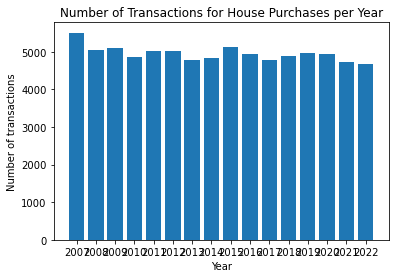

In [3]:
average_price_sqm_per_year = berlin_df.groupby('adat_year')['price_sqm'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean price per Square Meter')
plt.title('Mean Price per Square Meter for House Purchases per Year')
plt.show()

number_of_transactions_per_year = berlin_df.groupby('adat_year')['price_sqm'].count()
print(number_of_transactions_per_year)
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

### Dataset WK_cities

In [4]:
wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object})

df_cities = pd.DataFrame(wk_cities)

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_67199/4038894759.py:1: DtypeWarning: Columns (11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object})


In [5]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)

merged_df = pd.merge(df_cities, df_plz_city, how="left", on="plz")

berlin_cities_df = merged_df[merged_df['ort'] == 'Hamburg']
berlin_cities_df['adat_year'] = berlin_cities_df['adat'].astype(str).str[:4]

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_67199/2860140309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_cities_df['adat_year'] = berlin_cities_df['adat'].astype(str).str[:4]


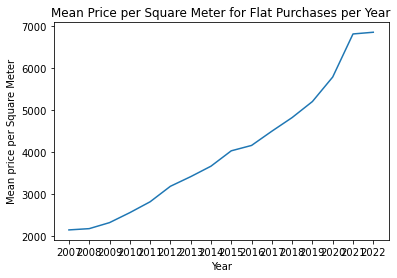

adat_year
2007    4652
2008    3903
2009    4018
2010    3921
2011    3921
2012    4030
2013    4036
2014    4018
2015    4177
2016    3836
2017    4018
2018    4033
2019    3786
2020    3908
2021    3946
2022    3697
Name: obid, dtype: int64


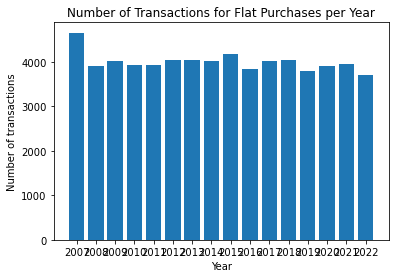

In [6]:
average_price_sqm_per_year = berlin_cities_df.groupby('adat_year')['price_sqm'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean price per Square Meter')
plt.title('Mean Price per Square Meter for Flat Purchases per Year')
plt.show()

number_of_transactions_per_year = berlin_cities_df.groupby('adat_year')['obid'].count()
print(number_of_transactions_per_year)
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for Flat Purchases per Year')
plt.show()